## Example: Does N$_{2}$ behave like an ideal diatomic gas? ##
From theory, the difference between the constant volume $c_{V}$ (J mol$^{-1}$ K$^{-1}$), and constant pressure $c_{P}$ (J mol$^{-1}$ K$^{-1}$) heat capacities should equal $R$. Let's test this derivation using data from NIST. Calculate the difference between $c_{V}$ and $c_{P}$ for N$_{2}$ at 1 ATM for a range of temperatures (T = 298K to T = 398K).

In [6]:
# Load Julia packages -
using DataFrames
using CSV
using PyPlot

# Load the data from NIST -
nitrogen_data_table = CSV.read("Nitrogen-NIST-1-ATM.txt",delim='\t');

In [4]:
nitrogen_data_table

,Temperature (K),Pressure (MPa),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/MPa),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase
1,298.15,0.10132,0.040882,24.461,6.1852,8.6636,191.48,20.818,29.172,352.07,2.1485,17.812,0.025735,vapor
2,308.15,0.10132,0.039552,25.283,6.3936,8.9554,192.44,20.823,29.173,357.92,1.997,18.271,0.026401,vapor
3,318.15,0.10132,0.038306,26.105,6.602,9.2471,193.37,20.828,29.177,363.68,1.8566,18.723,0.027059,vapor
4,328.15,0.10132,0.037137,26.928,6.8105,9.5389,194.28,20.836,29.182,369.34,1.7263,19.169,0.027709,vapor
5,338.15,0.10132,0.036036,27.75,7.019,9.8308,195.15,20.844,29.188,374.91,1.605,19.609,0.028353,vapor
6,348.15,0.10132,0.035,28.572,7.2277,10.123,196.0,20.855,29.197,380.39,1.4918,20.044,0.02899,vapor
7,358.15,0.10132,0.034021,29.394,7.4364,10.415,196.83,20.867,29.207,385.79,1.3859,20.474,0.029621,vapor
8,368.15,0.10132,0.033096,30.215,7.6453,10.707,197.64,20.881,29.219,391.1,1.2867,20.898,0.030246,vapor
9,378.15,0.10132,0.03222,31.037,7.8543,10.999,198.42,20.897,29.234,396.34,1.1936,21.317,0.030866,vapor
10,388.15,0.10132,0.031389,31.859,8.0634,11.292,199.18,20.915,29.25,401.5,1.106,21.732,0.031482,vapor


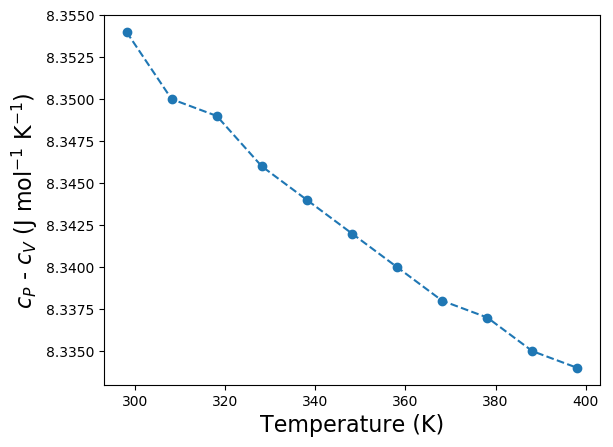

In [11]:
# Plot the difference between cv and cp as a function of T -
difference_heat_capacity = nitrogen_data_table[:,9] - nitrogen_data_table[:,8]
temp_range = nitrogen_data_table[:,1]

# make the plot -
plot(temp_range,difference_heat_capacity,"o--");

# label the axis -
xlabel("Temperature (K)",fontsize=16);
ylabel(L"$c_{P}$ - $c_{V}$ (J mol$^{-1}$ K$^{-1}$)",fontsize=16);

#### How many degrees of freedom does N$_{2}$ have?

Theory tells us that the specific constant volume heat capacity $c_{V}$ (J mol$^{-1}$ K$^{-1}$) for an _ideal gas_ is given by: 

\begin{equation}
c_{V} = \left(\frac{f}{2}\right)R
\end{equation} 

where $f$ denotes the number of degrees of freedom for the molecule of interest (in this case N$_{2}$). Let's use the $c_{V}$ values from NIST to estimate $f$:

In [27]:
## compute the degrees of freedom f -
data_point_index = 7
R = 8.314 # units: J mol^-1 K^-1
cV_value = nitrogen_data_table[data_point_index,8]

# compute f -
f_value = (2*cV_value)/R

5.019725763771951

#### Does $f$ change with temperature $T$?

In [26]:
cV_range = nitrogen_data_table[:,8]
f_range = (2/R).*cV_range

11-element Array{Float64,1}:
 5.007938417127737 
 5.009141207601636 
 5.010343998075535 
 5.012268462833774 
 5.014192927592014 
 5.016839066634592 
 5.019725763771951 
 5.023093577098869 
 5.026942506615347 
 5.0312725523213855
 5.036083714216983 

#### What is the internal energy of N$_{2}$?

Theory tells us that the specific molar internal energy  u (J mol$^{-1}$) of an _ideal gas_ is given by:

\begin{equation}
u = RT\left(\frac{f}{2}\right)
\end{equation}

where $T$ denotes temperature (K), $R$ denotes the ideal gas constant (J mol$^{-1}$ K$^{-1}$) and $f$ denotes the degrees of freedom of the molecule of interest. 

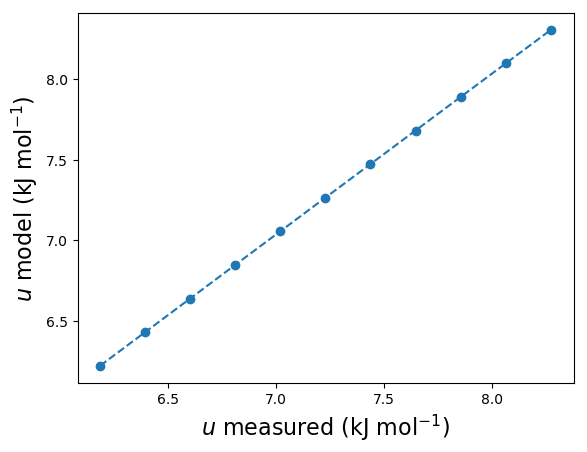

In [23]:
## Compute the internal energy and compare with the data from NIST -
temperate_range = nitrogen_data_table[:,1]
u_measured = nitrogen_data_table[:,5]

# compute the u-model (units: kJ/model )
u_model = ((1/1000)*(f_value/2)*R).*temperate_range

# plot the model versus the data -
plot(u_measured,u_model,"o--");

# label -
xlabel(L"$u$ measured (kJ mol$^{-1}$)", fontsize=16);
ylabel(L"$u$ model (kJ mol$^{-1}$)", fontsize=16);